# PCA

## Part 1: Data Processing

In [45]:
import matplotlib.pyplot as plt  
import numpy as np            
import pandas as pd              
import seaborn as sns 

from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

sns.set_theme()

# Load “penguins” dataset from Seaborn
penguins = sns.load_dataset("penguins")

# Drop any rows containing NaN values
penguins = penguins.dropna()

# Select four numeric features and convert to a NumPy array
X = penguins[
    ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
].to_numpy()
Xs = StandardScaler().fit_transform(X)      # mean=0, std=1 per column


y = penguins.species.to_numpy()

We will also center the data to account for the different scales of each feature. 

In [46]:
# Center the data by subtracting the column means
# A has zero mean in each column
A_std = Xs.copy()                           # already centered

## Part 2: The Model
The following code performs the SVD factorization and confirms that A≈U Σ V^T.

In [47]:
# Compute the Singular Value Decomposition of A
# full_matrices=False returns the compact form U (m×k), Σ (k,), Vt (k×n)
U, sigma, Vt = np.linalg.svd(A_std, full_matrices=False)

# Print the shapes of the SVD factors
print(f"np.shape(U) = {np.shape(U)}")
print(f"np.shape(sigma) = {np.shape(sigma)}")
print(f"np.shape(Vt) = {np.shape(Vt)} \n")

# Convert the 1-D sigma array into a diagonal matrix
sigma_mat = np.diag(sigma)

# Verify the decomposition A ≈ U · Σ · Vᵀ (up to numerical precision)
# np.allclose returns True if the two matrices are element-wise close
checker = np.allclose(A, U @ sigma_mat @ Vt)
print(f"A == U * sigma_mat * Vt: {checker} \n")

np.shape(U) = (333, 4)
np.shape(sigma) = (4,)
np.shape(Vt) = (4, 4) 

A == U * sigma_mat * Vt: False 



Now we extract the top principal‐component directions from the SVD and then projecting the (mean-centered) data onto the first two components. 

In [48]:
PC1 = Vt.T[:, 0]
PC2 = Vt.T[:, 1]
PC3 = Vt.T[:, 2]
PC4 = Vt.T[:, 3]

W2 = Vt.T[:, :2]
X2D = A_std.dot(W2)

After assigning each species a color and plotting, we can see that the clusters certainly are not random. On the x-axis, the spread of the data is visible, with data up to 4 standard deviations away from the mean. This makes sense- it's the first principal component, and thus the most variable.

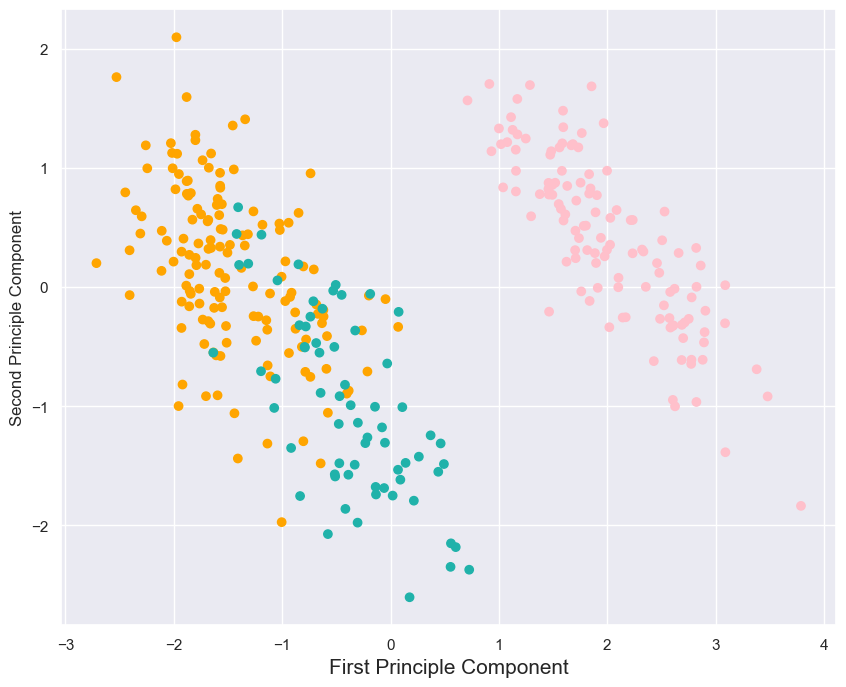

In [49]:
def peng_types(y):
    if y == "Adelie":
        return "orange"
    elif y == "Chinstrap":
        return "lightseagreen"
    else:
        return "pink"

c = [peng_types(label) for label in y]

plt.figure(figsize = (10, 8))
plt.scatter(X2D[:, 0], X2D[:, 1], c = c)
plt.xlabel("First Principle Component", fontsize = 15)
plt.ylabel("Second Principle Component")
plt.show()

---
## Part 3: Analysis
Now, we will incorporate the `skelarn` preprocessing and PCA classes, which allow us to simplify much of the code. After scaling the data and creating a PCA object with the scaled data as input, we can break down the variance from the data, both as proportions and percentages. This illustrates that the 2 most variable features can often account for around 90% (or more) of the variance.

In [50]:
scaled_X = preprocessing.scale(X)
pca = PCA()
pca.fit(scaled_X)

print(f"pca.explained_variance_ratio_ = {pca.explained_variance_ratio_}")

per_var = np.round(pca.explained_variance_ratio_*100, 2)
print(f"per_var = {per_var} \n")

pca.explained_variance_ratio_ = [0.68633893 0.19452929 0.09216063 0.02697115]
per_var = [68.63 19.45  9.22  2.7 ] 



For a visual of these percentages, see the bar chart below.

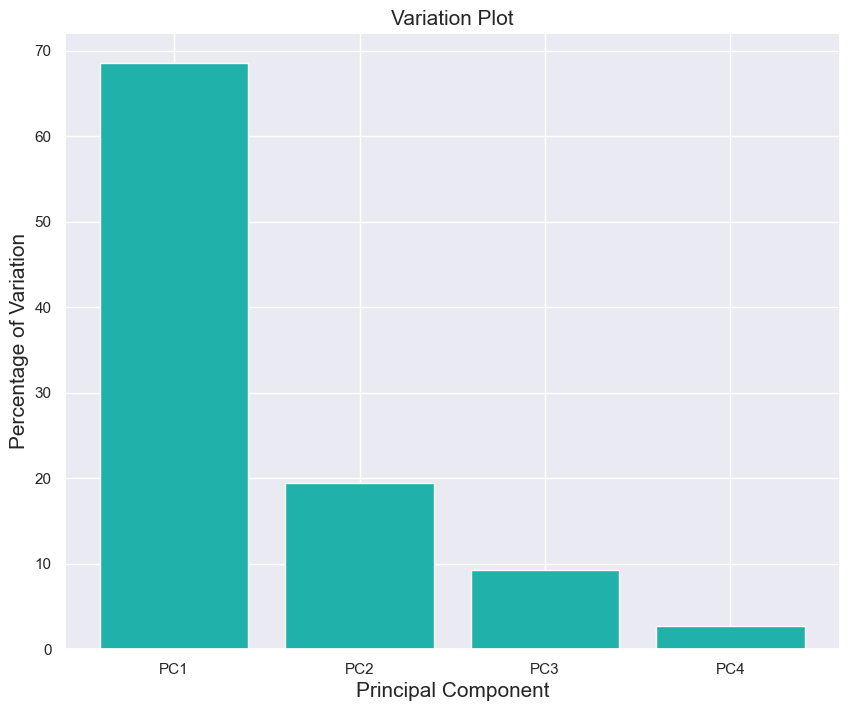

In [52]:
# Create a bar chart for the above array
# This chart is called a "Scree Plot"

labels = [f"PC{i}" for i in range(1,5)]

plt.figure(figsize = (10, 8))
plt.bar(x = range(1, 5), height = per_var, tick_label = labels, color = "lightseagreen")
plt.xlabel('Principal Component', fontsize = 15)
plt.ylabel('Percentage of Variation', fontsize = 15)
plt.title('Variation Plot', fontsize = 15)
plt.show()

In [21]:
# we call function pca.components_ to see how each PC is obtained
# as a linear combination of the original coordinates

# for example, here PC1 = 0.522 * sepal_length + 0.372 * sepal_width - 0.721 * petal_length - 0.262 * petal_width

features = list(set(penguins.columns) - {"species"})

pd.DataFrame(data = pca.components_, columns = labels, index = features)

ValueError: Shape of passed values is (4, 4), indices imply (6, 4)